# STEP 2 EDA

### Exploratory Data Analysis of the Audioclips per language

In [1]:
# Uncomment these lines if you need to install or update these packages
# !pip install --upgrade librosa
# !pip install --upgrade soundfile

#We strongly recommend to update ffmpeg library

In [1]:
import os
import random
import librosa
import soundfile as sf
import matplotlib.pyplot as plt
import numpy as np
from glob import glob
import pygame

pygame 2.4.0 (SDL 2.26.4, Python 3.9.5)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [3]:
def exploring_audio(language_mp3_path, analysis_window_length, language_dic):
    """
    This function samples mp3 files and analyzes the dataset content.
    """

    language_list = os.listdir(language_mp3_path)

    for language in language_list:
        language_path = os.path.join(language_mp3_path, language)

        # Skip non-directory items
        if not os.path.isdir(language_path):
            continue

        language_name = language_dic.get(language, "Unknown language!")

        clips_path = os.path.join(language_path, "clips")
        # get a list of all files in the folder
        mp3_list = os.listdir(clips_path)
        # choose a random file from the list
        random_file = random.choice(mp3_list)
        mp3_path = os.path.join(clips_path, random_file)

        # Try to read the audio file
        try:
            y, sr = sf.read(mp3_path)
        except Exception as e:
            print(f"Error reading {mp3_path}: {e}")
            continue

        print(f"Playing a random file in {language_name}: {random_file}")

        # Compute MFCC
        hop_length = int(analysis_window_length * sr)

        # Check if the audio signal is non-empty
        if len(y) > 0:
            # Play the random MP3 file
            pygame.mixer.init()
            pygame.mixer.music.load(mp3_path)
            pygame.mixer.music.play()
            while pygame.mixer.music.get_busy():
                pygame.time.Clock().tick(10)

        # Plot raw waveform
        plt.figure(figsize=(16, 6))
        librosa.display.waveshow(y=y, sr=sr, axis='s')
        plt.title("Digital Audio waves in " + language_name, fontsize=20)
        plt.show()

        # Summary information
        print('Sample rate of the clip (KHz):', sr)
        # Verify length of the audio
        print('Duration of the clip:', int(len(y))/int(sr))
        print('\n')

        # transform y into melspectogram represenation
        y_melspec = librosa.amplitude_to_db(np.abs(librosa.stft(y) ), ref=np.max)
        # plot melspectogram
        plt.figure(figsize = (16, 6))
        librosa.display.specshow(y_melspec, sr = sr, hop_length = hop_length, x_axis = 'time', y_axis = 'log')
        plt.colorbar()
        plt.title("Mel Spectogram " + language_name, fontsize = 20)
        plt.show()

        # transform y into MFCC represenation
        y_mfcc = librosa.feature.mfcc(y=y, sr=sr, hop_length = hop_length)
        # plot MFCC
        plt.figure(figsize = (16, 6))
        librosa.display.specshow(y_mfcc, sr = sr, hop_length = hop_length, x_axis = 'time', y_axis = 'log')
        plt.colorbar()
        plt.title("MFCC " + language_name, fontsize = 20)
        plt.show()

        # Check if the audio signal is non-empty
        if len(y) > 0:
            # Audio analysis and plotting code here...

            # Total duration and clip duration code:
            max_clip = -1
            min_clip = float('inf')
            duration_sec = 0.0

            all_files = glob(clips_path + '/*.mp3')

            for file in all_files:
                file_duration = librosa.core.get_duration(path=file)
                duration_sec += file_duration

                if max_clip < file_duration:
                    max_clip = file_duration

                if min_clip > file_duration:
                    min_clip = file_duration

            duration_h = duration_sec / 60.0 / 60.0
            print('Total duration of ' + language_name + ' is ' + str(round(duration_h, 1)) + ' h')
            print(f"The duration of the largest clip is: {max_clip}")
            print(f"The duration of the shortest clip is: {min_clip}")
            print('\n')
            print("*" * 120)
            print('\n')

        else:
            print(f"Skipping {random_file} because it has no samples.")

In [6]:
#Parameters for all exploration
language_dic = {"it" : "Italian", "es" : "Spanish" , "pt": "Portuguese", "ca": "Catalan", "fr": "French", "ro": "Romanian"}
analysis_window_length = 0.01  # 10 ms in seconds
language_mp3_path = "/Users/Andee/Documents/CBS - Data Science/Second Semester/Machine Learning/Assignments/MLAssignments/FinalProject/languages"

Playing a random file in Italian: common_voice_it_35302455.mp3


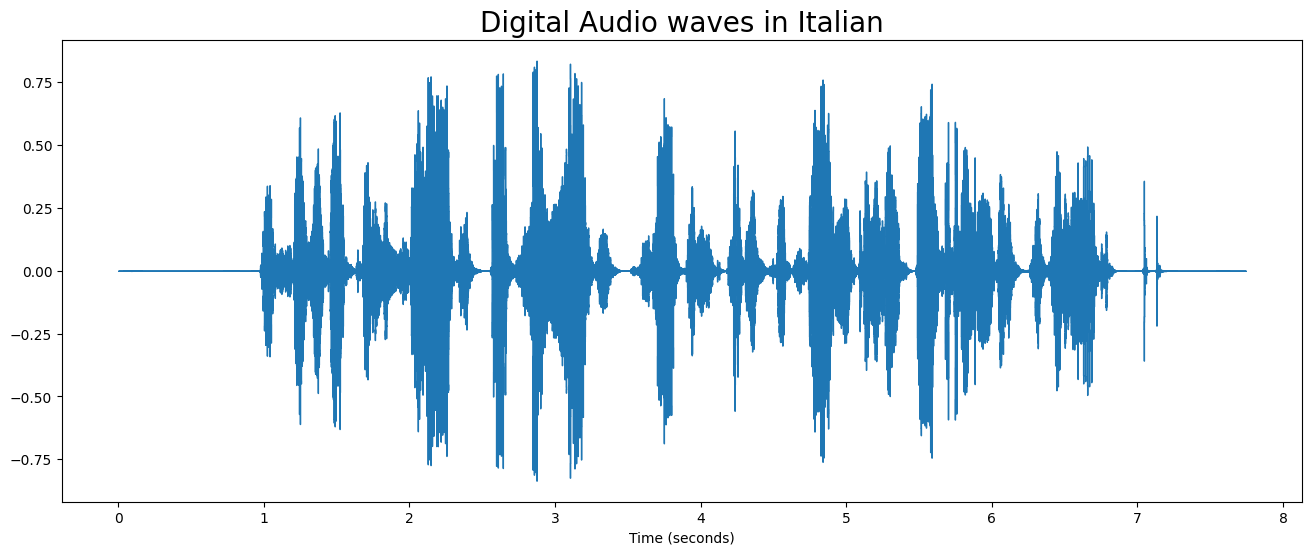

Sample rate of the clip (KHz): 32000
Duration of the clip: 7.744




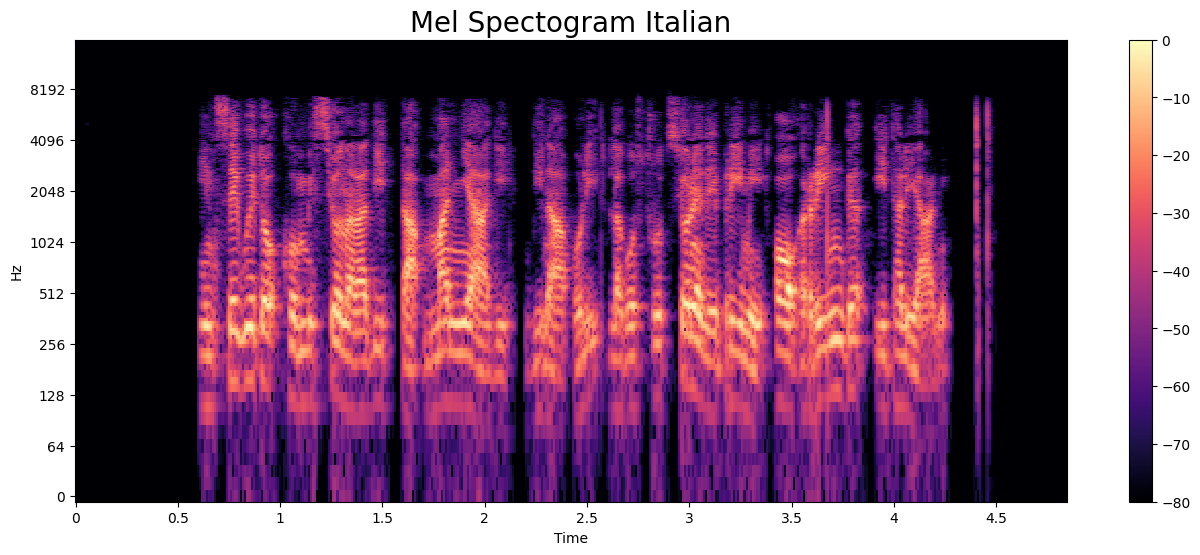

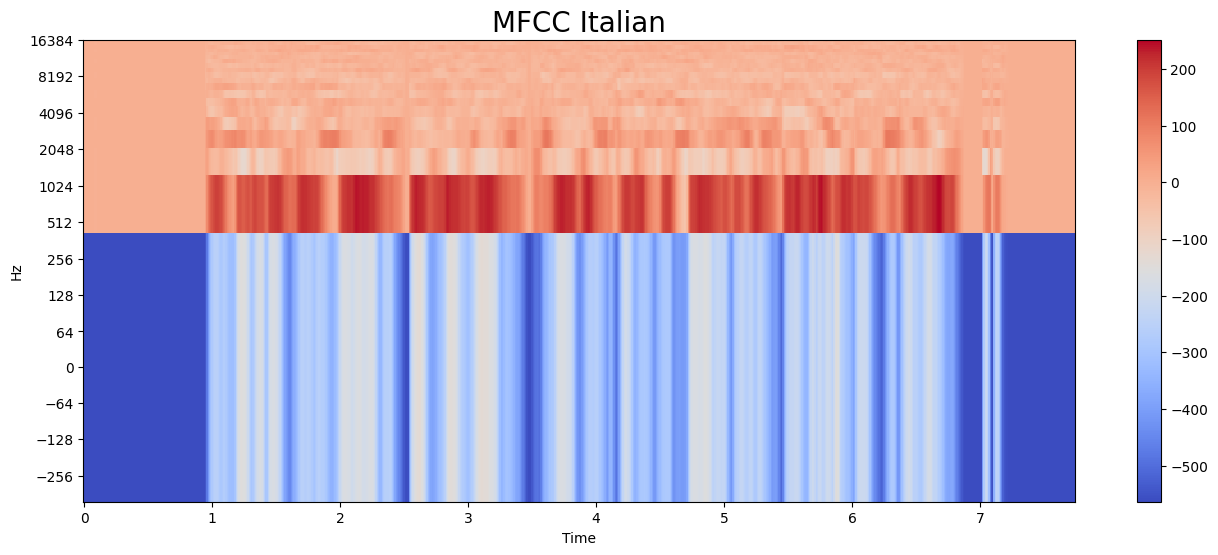

Total duration of Italian is 12.3 h
The duration of the largest clip is: 10.5915
The duration of the shortest clip is: 1.3035


************************************************************************************************************************


Playing a random file in Catalan: common_voice_ca_37038105.mp3


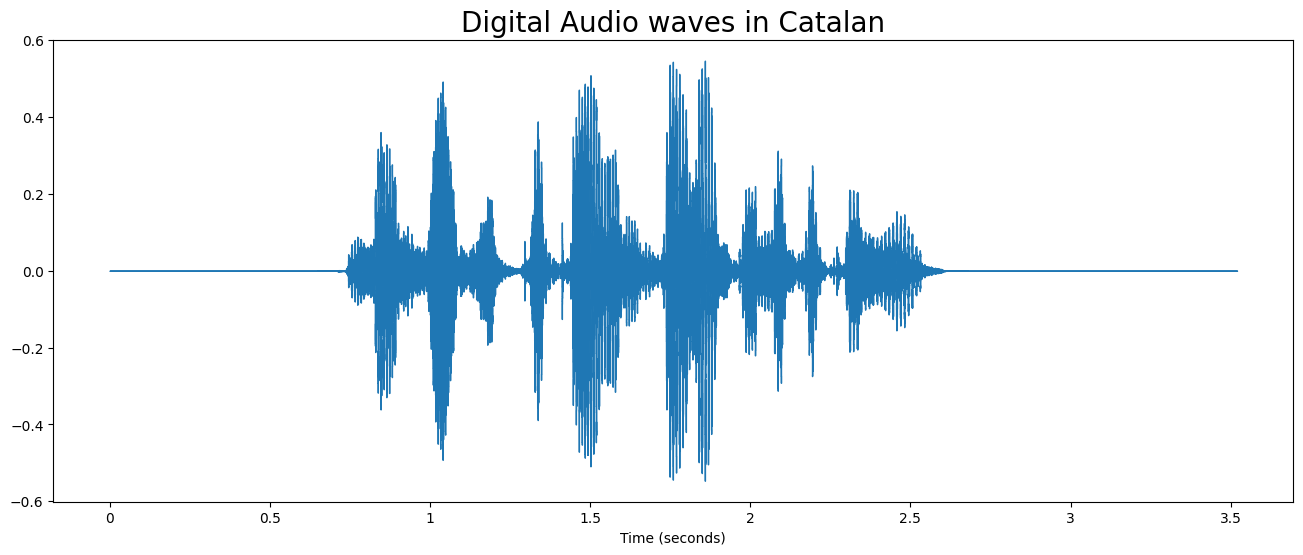

Sample rate of the clip (KHz): 32000
Duration of the clip: 3.52




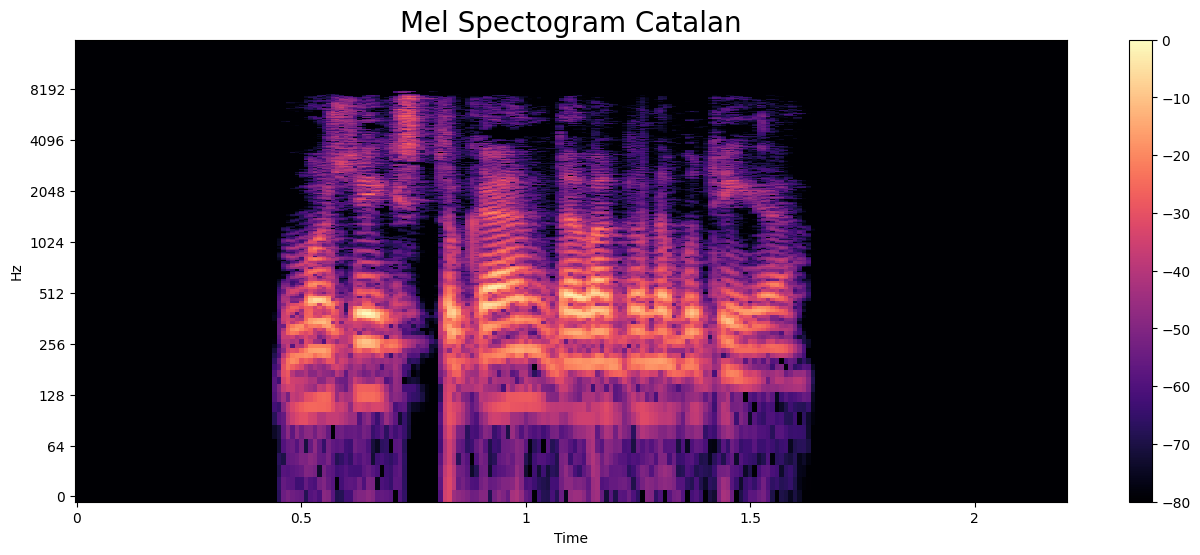

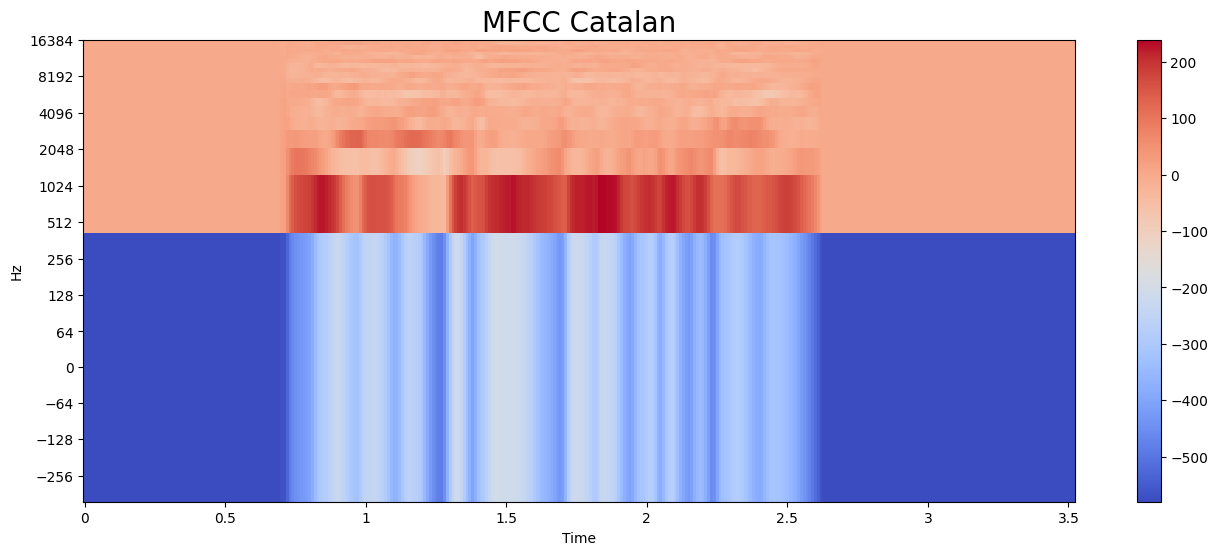

Total duration of Catalan is 171.6 h
The duration of the largest clip is: 20.4915
The duration of the shortest clip is: 0.20365625


************************************************************************************************************************


Playing a random file in Romanian: common_voice_ro_26267498.mp3


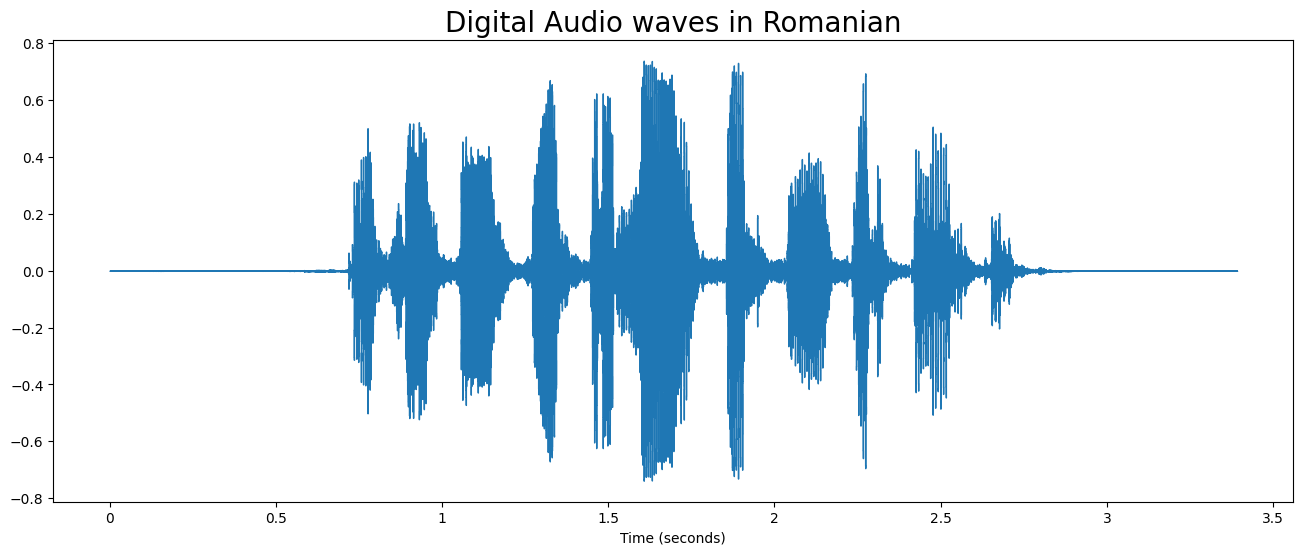

Sample rate of the clip (KHz): 32000
Duration of the clip: 3.392




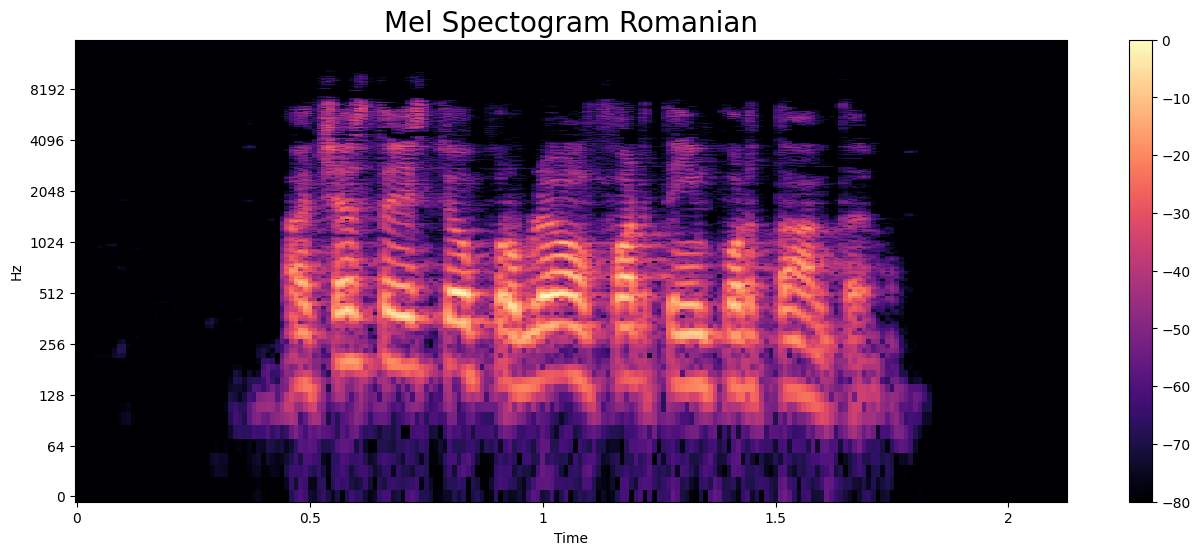

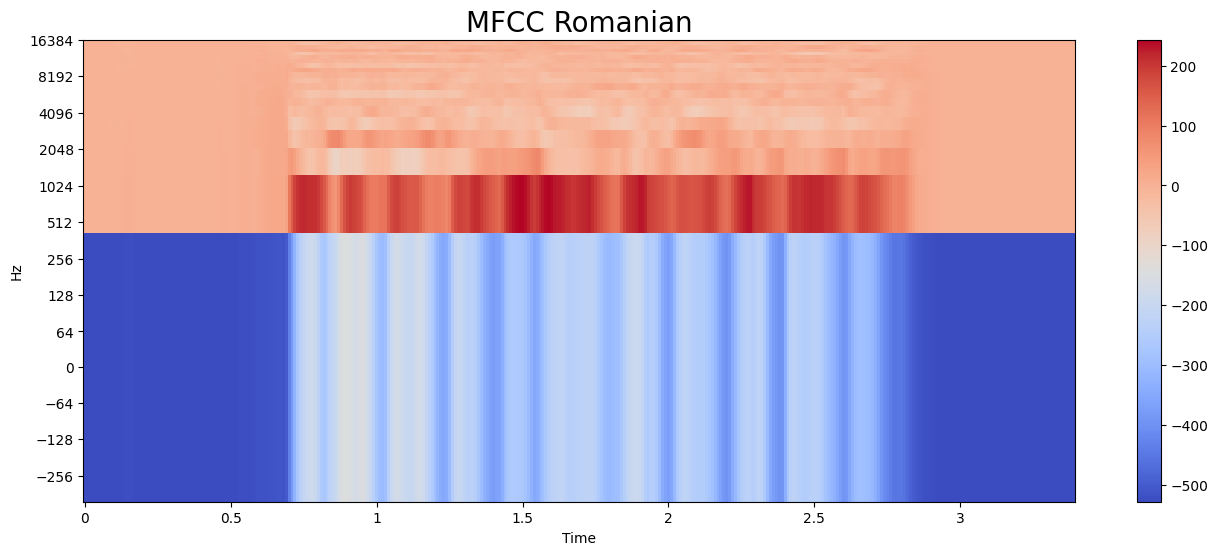

Total duration of Romanian is 42.2 h
The duration of the largest clip is: 16.3875
The duration of the shortest clip is: 1.421625


************************************************************************************************************************


Playing a random file in Portuguese: common_voice_pt_36898695.mp3


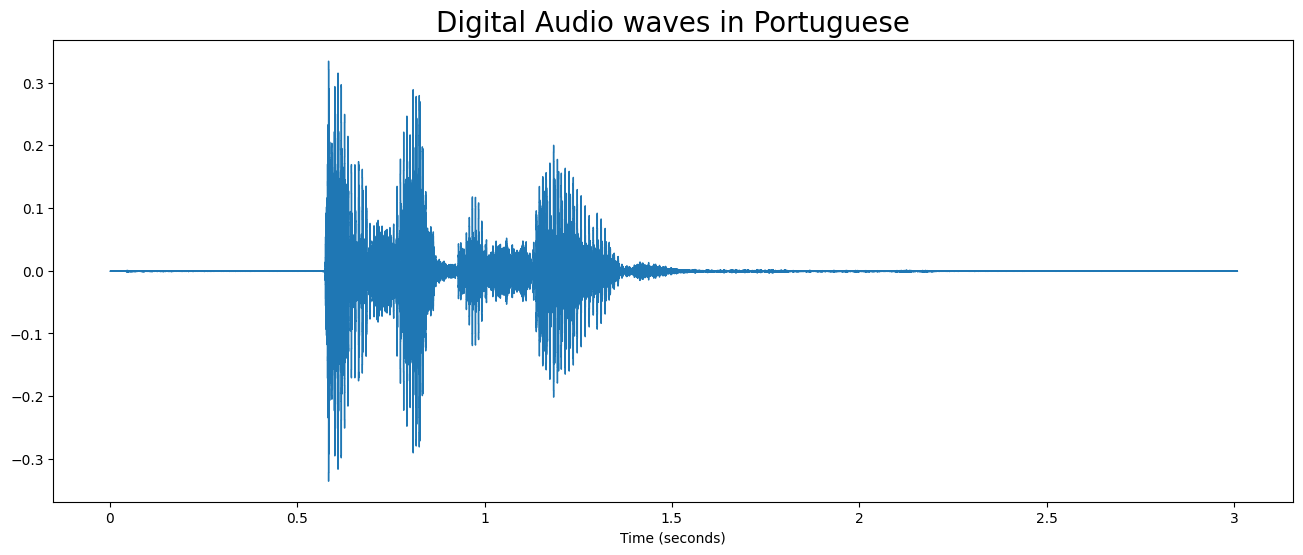

Sample rate of the clip (KHz): 32000
Duration of the clip: 3.008




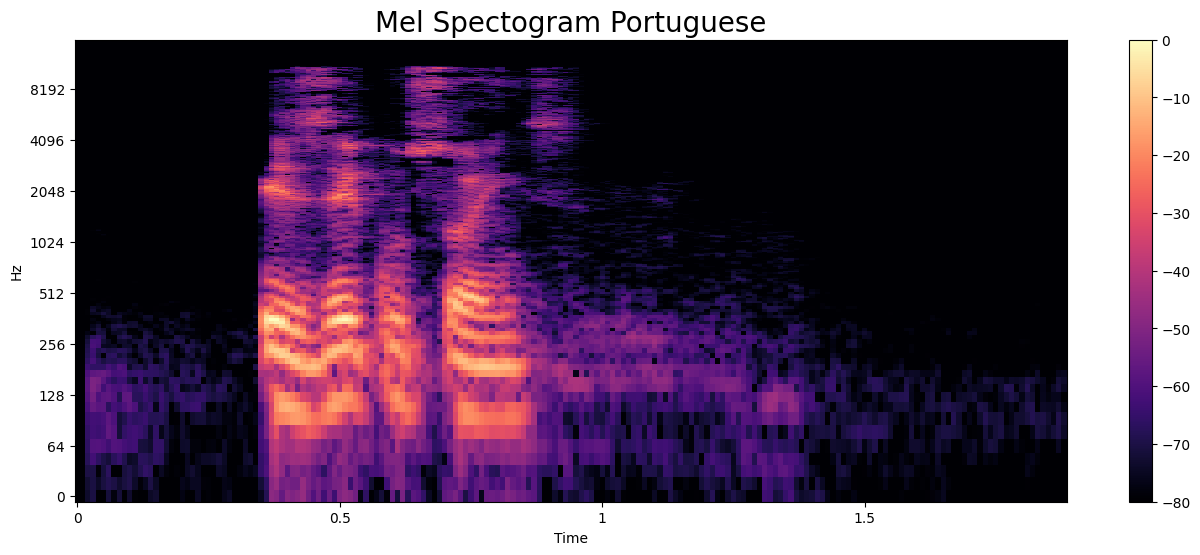

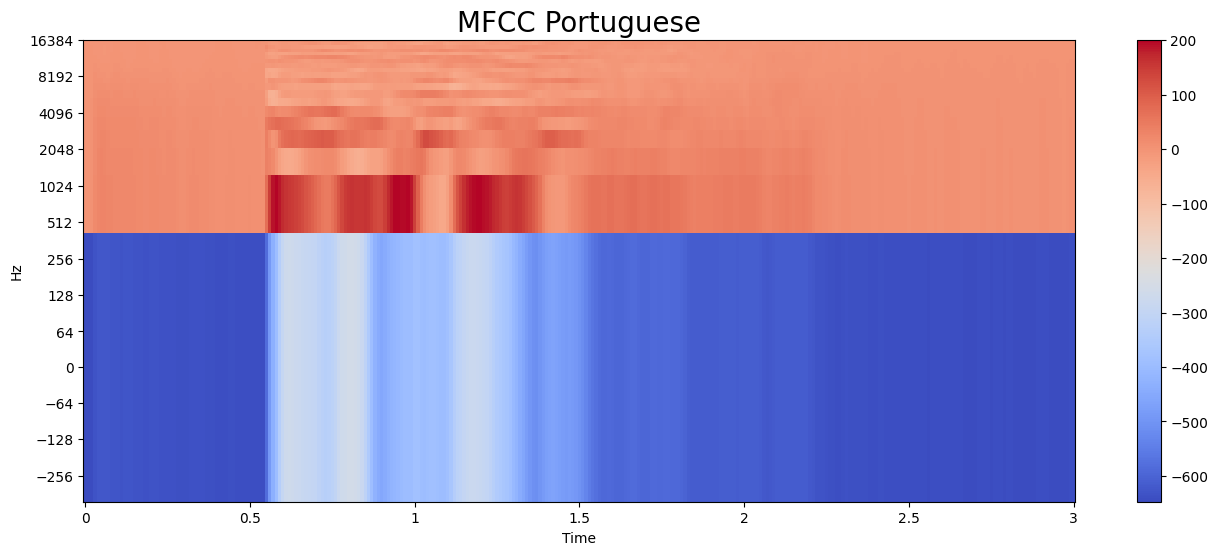

Total duration of Portuguese is 16.5 h
The duration of the largest clip is: 10.5915
The duration of the shortest clip is: 0.10115625


************************************************************************************************************************


Playing a random file in French: common_voice_fr_36796993.mp3


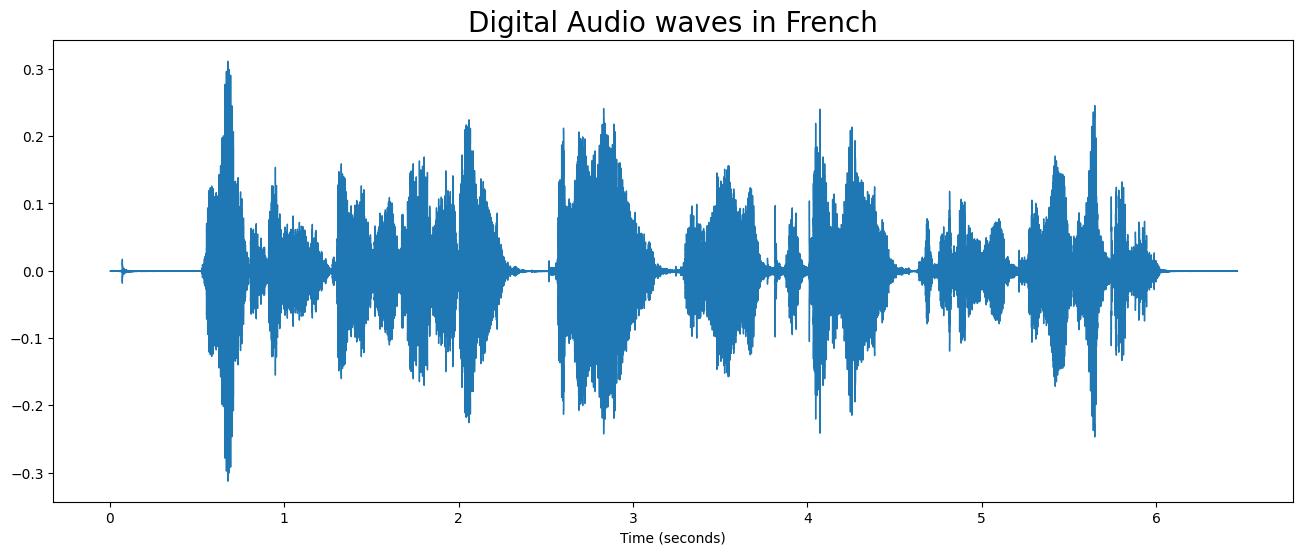

Sample rate of the clip (KHz): 32000
Duration of the clip: 6.464




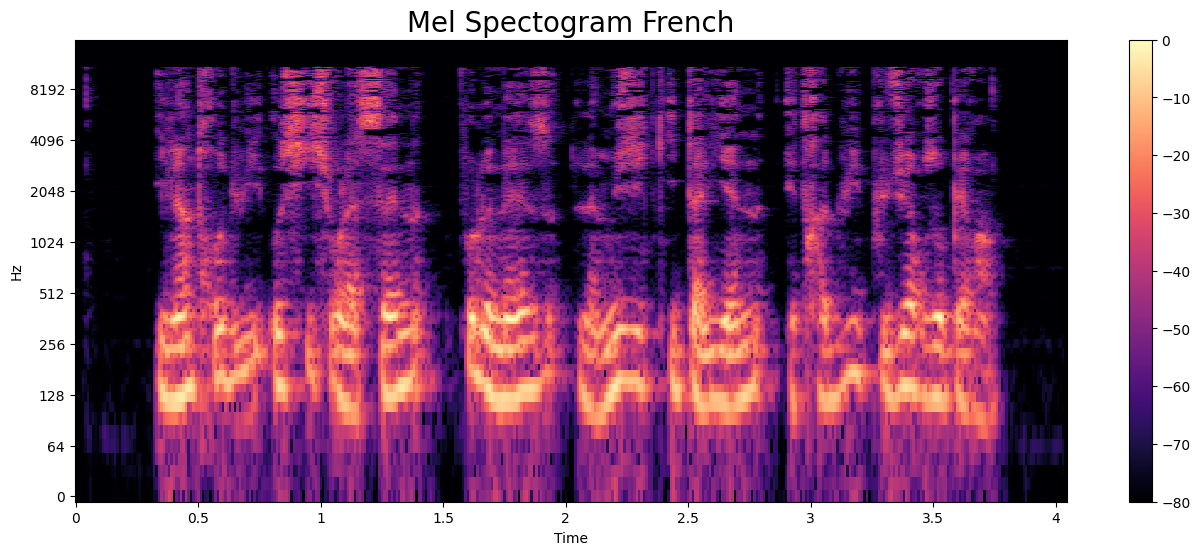

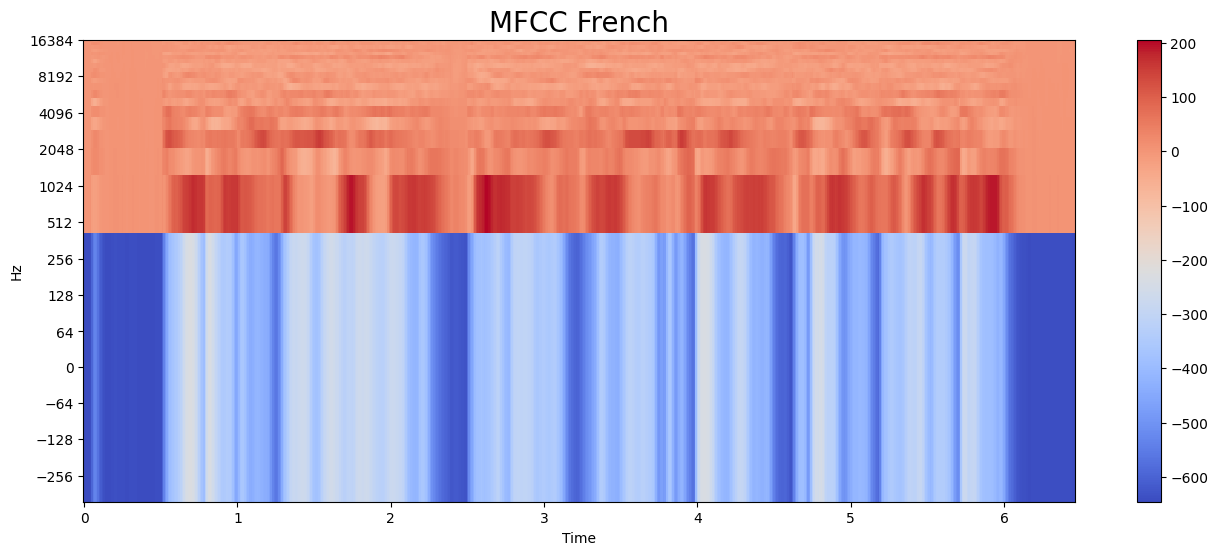

Total duration of French is 11.4 h
The duration of the largest clip is: 10.5915
The duration of the shortest clip is: 1.8435


************************************************************************************************************************


Playing a random file in Spanish: common_voice_es_36975495.mp3


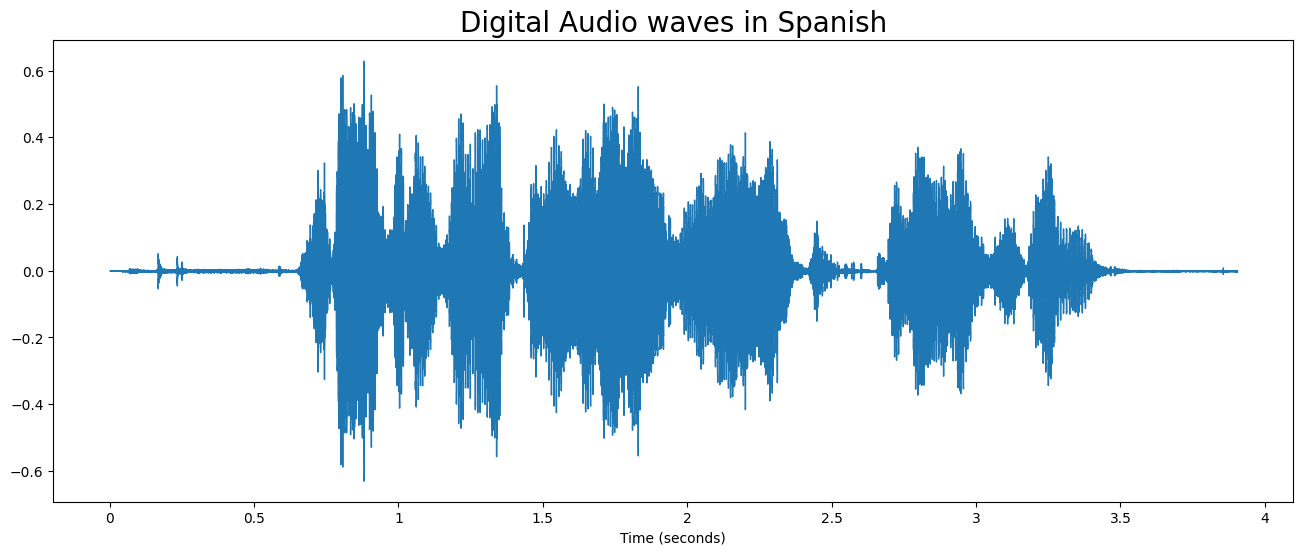

Sample rate of the clip (KHz): 32000
Duration of the clip: 3.904




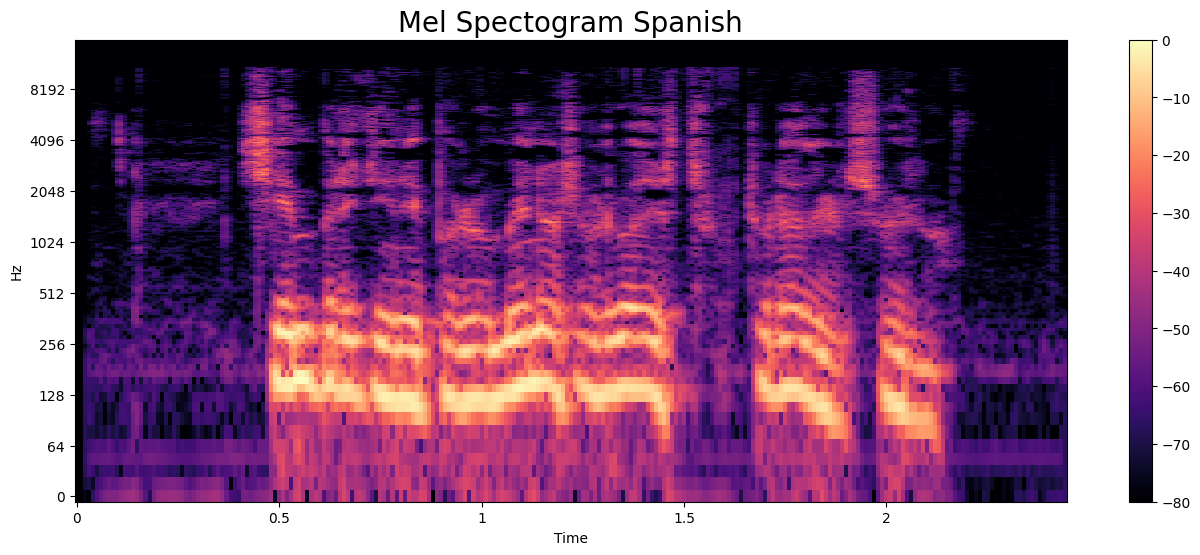

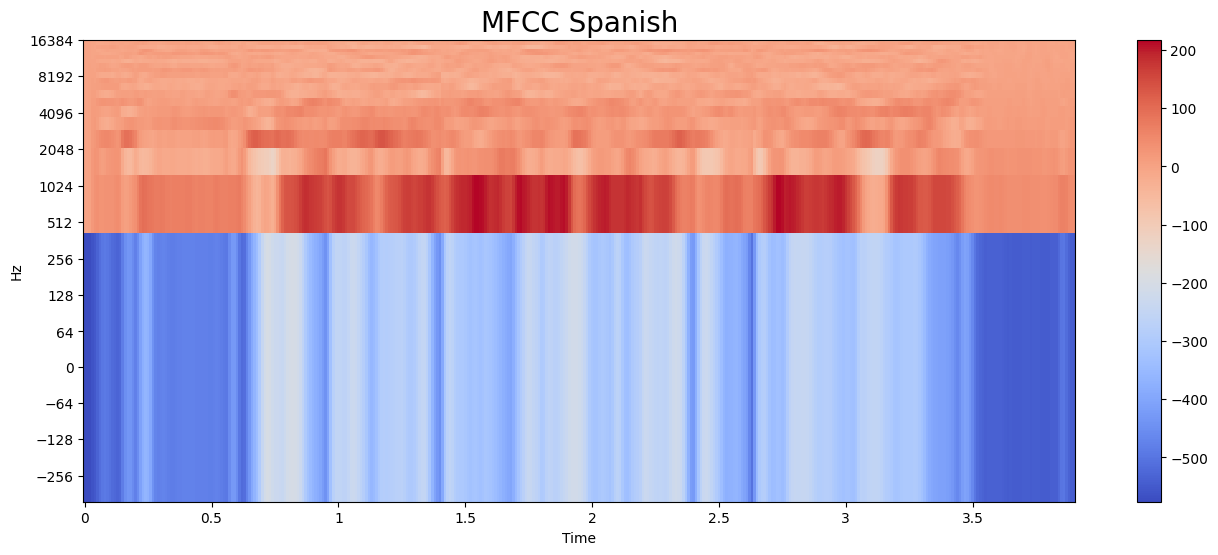

Total duration of Spanish is 24.0 h
The duration of the largest clip is: 11.8155
The duration of the shortest clip is: 1.5555


************************************************************************************************************************




In [7]:
exploring_audio(language_mp3_path, analysis_window_length, language_dic)